# **Personal Expense Tracker**

## Problem statement:  
In today’s fast-paced world, individuals need to track and manage their expenses 
effectively. Your task is to build a personal expense tracker that allows users to log 
daily expenses, categorize them, and track spending against a monthly budget. The 
tracker should also be able to save and load expenses from a file for future 
reference. 
## Objectives: 
1.	Design and implement a personal expense tracker that enables users to manage their expenses 
2.	Allow users to categorize expenses and set monthly budgets 
3.	Implement file-handling functionality to save and load expense data 
4.	Create an interactive, menu-driven interface for ease of use 

### Please find the python code in code section:-

#### displayMenu() function displays an interactive menu to choose an option. This time, expenses tracker is loaded from disk to cache (list of dictionary objects).
##### User has following options to select
1) If the user selects option 1, call the function to add an expense 
2) If the user selects option 2, call the function to view expenses 
3) If the user selects option 3, call the function to track the budget.
4) If the user selects option 4, call the function to save expenses to the file. 
5) If the user selects option 5, save the expenses and exit the program.

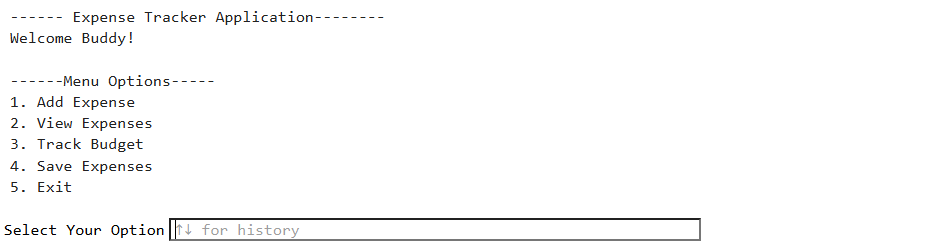


#### If Option 1 selected, it calls addExpenses() function and ask user to input their expenses.
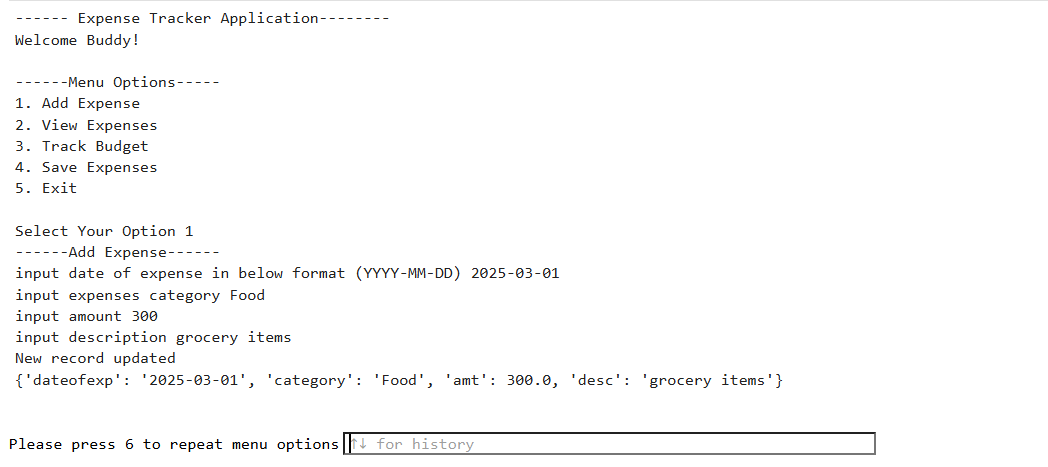

#### If Option 2 selected, it calls viewExpenses() function and shows the expenses.
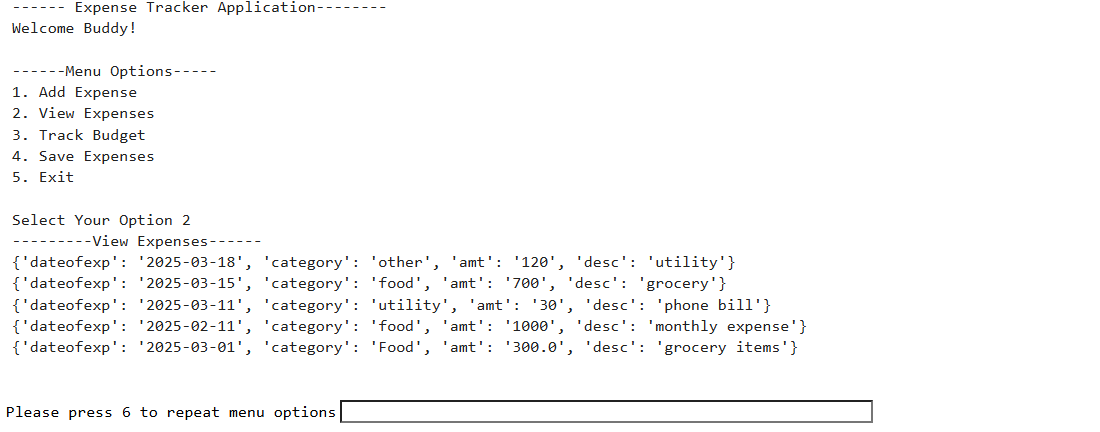

#### If Option 3 selected, it calls trackBudget() function and shows the current month budget, expenses and alert if expenses exceeeded the budget amount. User can reset the budget amount if he wants.
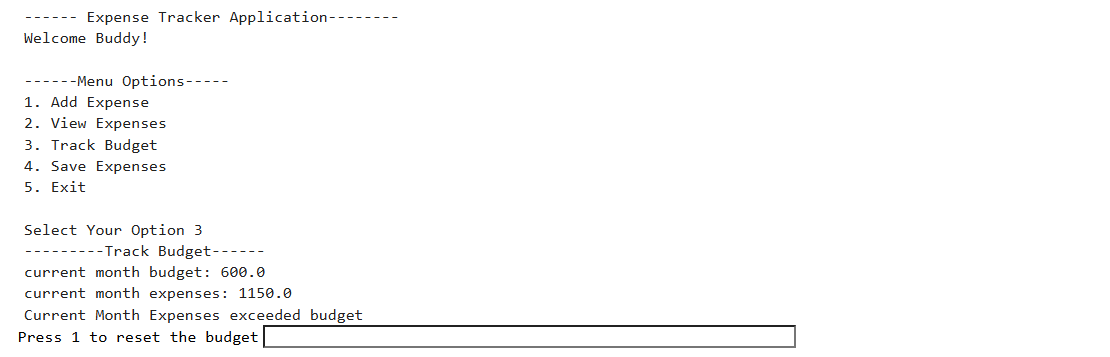

#### If Option 3 selected, it calls saveExpenses() function which saves the expenses and budget into CSV file.
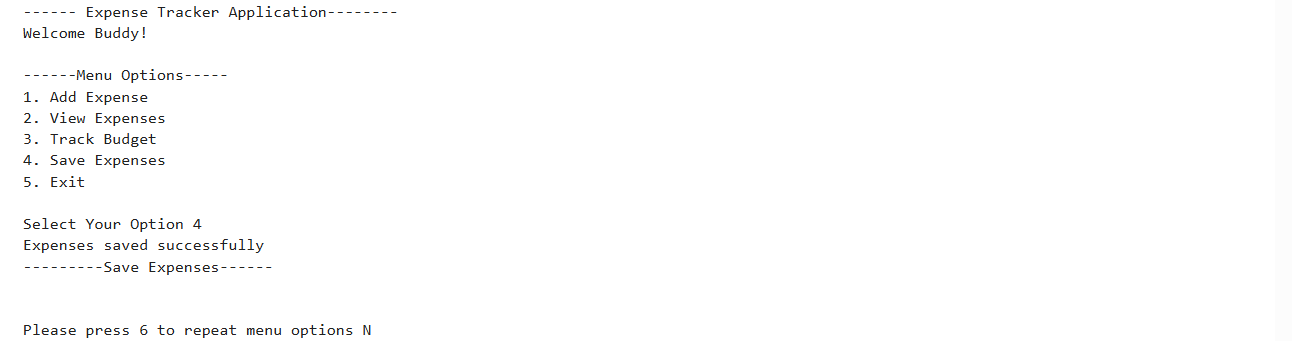

#### If Option 5 selected, User exits from the application menu. At this time, expenses tracker files are saved and global variables values cache is reset.
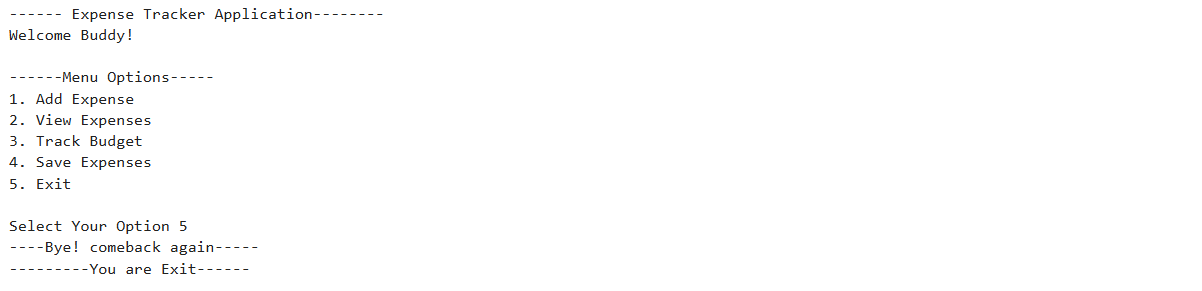

Note:-
Exception handling implemented in case users input a wrong value or any issue in file opening or saving.
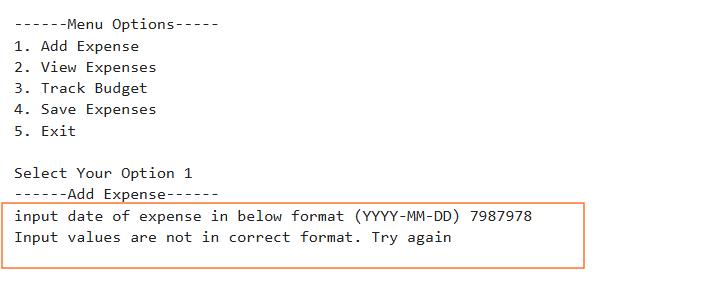

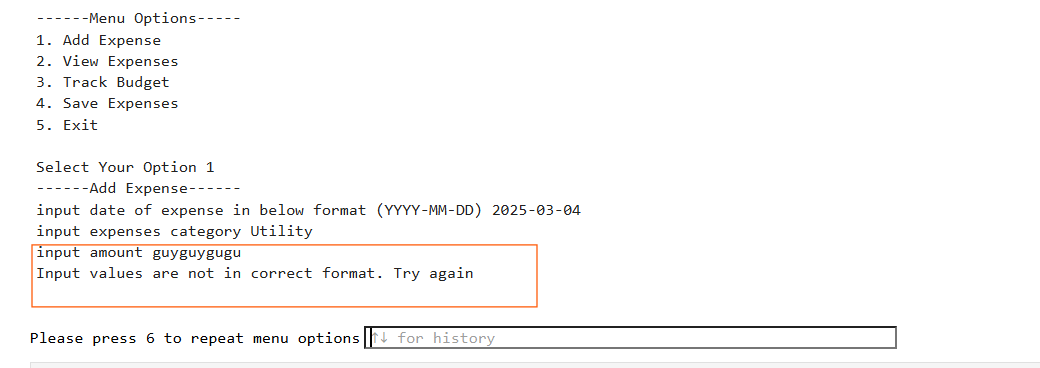

<br>
<br>
<br>

In [13]:
import csv
from datetime import date
import datetime as dt

#global variables
trackerfilepath="expense_tracker.csv"
monthlybudgetfilepath="monthlybudget_tracker.csv"
budgetlist=[]
expenseslist=[]
budgetfieldnames = ['month', 'year', 'budgetamt']
expfieldnames = ['dateofexp', 'category', 'amt', 'desc']

def displayMenu():
    #function displays an interactive menu to choose an option
    try:
        print("------ Expense Tracker Application--------")
        print("Welcome Buddy!")
        exit=0
        resetCache()
        loadExpenses()

        while exit==0:
            print('\n------Menu Options-----')
            print("1. Add Expense")
            print("2. View Expenses")
            print("3. Track Budget")
            print("4. Save Expenses")
            print("5. Exit")
            option=input("\nSelect Your Option")
            if option == '1':
                print("------Add Expense------")
                addExpenses()
            elif option == '2':
                print("---------View Expenses------")
                viewExpenses()
            elif option == '3':
                print("---------Track Budget------")
                trackBudget()
            elif option == '4':
                saveExpenses()
                resetCache()
                loadExpenses()
                print("Expenses saved successfully")
                print("---------Save Expenses------")
            elif option == '5':
                saveExpenses()
                resetCache()
                print("----Bye! comeback again-----")
                print("---------You are Exit------")
                break
            else:
                print("Invalid option entered")

            print('\n')
            option=input("Please press 6 to repeat menu options")
            if option=="6":
                continue
            else:
                saveExpenses()
                resetCache()
                break

    except Exception as e:
        print(e)
    
    return


def resetCache():
    # Clear the expenses list and budget list on Exit and after saving into file
    global budgetlist
    global expenseslist
    budgetlist=[]
    expenseslist=[]
    
    return

def loadExpenses():
    # Load the expenses and budget from the file
    try:
        #Load Expenses
        file_path = trackerfilepath
        # Read data from CSV file into dictionaries
        with open(file_path, 'r') as expfile:
            reader = csv.DictReader(expfile)
            for row in reader:
                #print(row)
                expenseslist.append(row)
                
    except FileNotFoundError:
            
        file_path=trackerfilepath
        with open(file_path, 'w', newline='') as expfile:
            fieldnames = expfieldnames
            writerexp = csv.DictWriter(expfile, fieldnames=fieldnames,extrasaction='ignore')
            if expfile.tell() == 0:
                 writerexp.writeheader()
    except Exception as e:
        print(e)

    try:
        #load budget  
        file_path=monthlybudgetfilepath
        with open(file_path, 'r') as budgetfile:
            reader = csv.DictReader(budgetfile)
            for row in reader:
                #print(row)
                budgetlist.append(row)          
    
    except FileNotFoundError:
        file_path=monthlybudgetfilepath
        with open(file_path, 'w', newline='') as budgetfile:
            fieldnames =budgetfieldnames
            writerbgt = csv.DictWriter(budgetfile, fieldnames=fieldnames,extrasaction='ignore')
            if budgetfile.tell() == 0:
                writerbgt.writeheader()
    except Exception as e:
        print(e)

    return
     
def viewExpenses():
    #View all expenses from the list
    for row in expenseslist:
        print(row)
    return

def addExpenses():
    # Add expenses in to expenses list
    row={}
    try:
        row['dateofexp']=dt.datetime.strptime(input('input date of expense in below format (YYYY-MM-DD)'), "%Y-%m-%d").date().strftime("%Y-%m-%d")
        row['category']=input('input expenses category')
        row['amt']=float(input('input amount'))
        row['desc']=input('input description')
        expenseslist.append(row)
        print('New record updated')
        print(row)
    except ValueError:
        print("Input values are not in correct format. Try again")
    except Exception as e:
        print(e)
    return
    
def saveExpenses():
    #Save expenses and budget into file
    #Save Expenses
    try:
        file_path=trackerfilepath
        with open(file_path, 'w', newline='') as expfile:
            fieldnames = expfieldnames
            writerexp = csv.DictWriter(expfile, fieldnames=fieldnames,extrasaction='ignore')
            if expfile.tell() == 0:
                 writerexp.writeheader()
            writerexp.writerows(expenseslist)

        #Save the monthly budget   
        file_path=monthlybudgetfilepath
        with open(file_path, 'w', newline='') as budgetfile:
            fieldnames = budgetfieldnames
            writerbgt = csv.DictWriter(budgetfile, fieldnames=fieldnames,extrasaction='ignore')
            if budgetfile.tell() == 0:
                writerbgt.writeheader()
            writerbgt.writerows(budgetlist)    
        
    except Exception as e:
        print(e)
    return

def trackBudget():
  
    #read budget for current month and year
    currmonth=date.today().month
    curryear=date.today().year
    currbudget=getBudget(currmonth,curryear)
    print('current month budget:',currbudget)    
    currexpenses=getExpenses(currmonth,curryear)
    print('current month expenses:',currexpenses)    
    #display current month warning if budget exceeded
    if(currexpenses>currbudget):
        print("Current Month Expenses exceeded budget")
    
    #if no monthly budget set, ask to set
    if(currbudget==0):
        if(input('Current Month budget amount is zero. Press 1 to set the budget')=="1"):
            setMonthlyBudget()   
    else:
        if(input('Press 1 to reset the budget')=="1"):
            setMonthlyBudget()   
    
    return    
        
    
def setMonthlyBudget():
    #Set monthly expense budget
    row={}
    try:
        print('-----Set Monthly Budget Amt.------')
        row['month']=int(input('Input month (value between 1-12)'))
        
        # validate month number
        if not (1<=row['month']<=12): 
             raise ValueError
        
        row['year']=int(input('Input year'))
        row['budgetamt']=float(input('Input Budget Amt'))
        for d in budgetlist:
            if(int(d['month'])==row['month'] and int(d['year'])== row['year']):
                # Update existing values
                d['budgetamt']=row['budgetamt']
                print('Budget Amt set')
                return
        #if value not exist in budget list    
        budgetlist.append(row)
        print('Budget Amt set')
    except ValueError:
        print("Input values are not in correct format. Try again")
        
    return

def getExpenses(month,year):
    # Return expenses for the input month and year
    expenses=0
    for d in expenseslist:
        expdate=dt.datetime.strptime(d['dateofexp'], "%Y-%m-%d").date()
        if(expdate.month==month and expdate.year==year):
            expenses+= float(d['amt'])
    return expenses

def getBudget(month, year):
    # Return budget for the input month and year
    budget=0
    for d in budgetlist:
        if(int(d['month'])==month and int(d['year'])==year):
            budget+= float(d['budgetamt'])
    return budget

In [5]:
###### Calling Expense Tracking Application Display Menu ######
displayMenu()    

------ Expense Tracker Application--------
Welcome Buddy!

------Menu Options-----
1. Add Expense
2. View Expenses
3. Track Budget
4. Save Expenses
5. Exit



Select Your Option 1


------Add Expense------


input date of expense in below format (YYYY-MM-DD) 2025-03-01
input expenses category Food
input amount 300
input description grocery items


New record updated
{'dateofexp': '2025-03-01', 'category': 'Food', 'amt': 300.0, 'desc': 'grocery items'}




Please press 6 to repeat menu options N


In [7]:
displayMenu()

------ Expense Tracker Application--------
Welcome Buddy!

------Menu Options-----
1. Add Expense
2. View Expenses
3. Track Budget
4. Save Expenses
5. Exit



Select Your Option 2


---------View Expenses------
{'dateofexp': '2025-03-18', 'category': 'other', 'amt': '120', 'desc': 'utility'}
{'dateofexp': '2025-03-15', 'category': 'food', 'amt': '700', 'desc': 'grocery'}
{'dateofexp': '2025-03-11', 'category': 'utility', 'amt': '30', 'desc': 'phone bill'}
{'dateofexp': '2025-02-11', 'category': 'food', 'amt': '1000', 'desc': 'monthly expense'}
{'dateofexp': '2025-03-01', 'category': 'Food', 'amt': '300.0', 'desc': 'grocery items'}




Please press 6 to repeat menu options N


In [11]:
displayMenu()

------ Expense Tracker Application--------
Welcome Buddy!

------Menu Options-----
1. Add Expense
2. View Expenses
3. Track Budget
4. Save Expenses
5. Exit



Select Your Option 3


---------Track Budget------
current month budget: 600.0
current month expenses: 1150.0
Current Month Expenses exceeded budget


Press 1 to reset the budget 7


Please press 6 to repeat menu options N


In [15]:
displayMenu()

------ Expense Tracker Application--------
Welcome Buddy!

------Menu Options-----
1. Add Expense
2. View Expenses
3. Track Budget
4. Save Expenses
5. Exit



Select Your Option 5


----Bye! comeback again-----
---------You are Exit------


In [17]:
displayMenu()

------ Expense Tracker Application--------
Welcome Buddy!

------Menu Options-----
1. Add Expense
2. View Expenses
3. Track Budget
4. Save Expenses
5. Exit



Select Your Option 4


Expenses saved successfully
---------Save Expenses------




Please press 6 to repeat menu options N


In [ ]:
displayMenu()

------ Expense Tracker Application--------
Welcome Buddy!

------Menu Options-----
1. Add Expense
2. View Expenses
3. Track Budget
4. Save Expenses
5. Exit



Select Your Option 1


------Add Expense------


input date of expense in below format (YYYY-MM-DD) 7987978


Input values are not in correct format. Try again




Please press 6 to repeat menu options 6



------Menu Options-----
1. Add Expense
2. View Expenses
3. Track Budget
4. Save Expenses
5. Exit



Select Your Option 1


------Add Expense------


input date of expense in below format (YYYY-MM-DD) 2025-03-04
input expenses category Utility
input amount guyguygugu


Input values are not in correct format. Try again


